## Project Title: Adult Census Income Prediction

### Problem Statement:
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

Data description:- 
https://www.kaggle.com/datasets/overload10/adult-census-dataset

The dataset contains 32,561 entries with a total of 15 columns representing different attributes of the people. Here’s the list;

1) Age: Discrete (from 17 to 90)

2) Work class (Private, Federal-Government, etc): Nominal (9 categories)

3) Final Weight (the number of people the census believes the entry represents): Discrete

4) Education (the highest level of education obtained): Ordinal (16 categories)

5) Education Number (the number of years of education): Discrete (from 1 to 16)

6) Marital Status: Nominal (7 categories)

7) Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)

8) Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)

9) Race: Nominal (5 categories)

10) Sex: Nominal (2 categories)

11) Capital Gain: Continous

12) Capital Loss: Continous

13) Hours (worked) per week: Discrete (from 1 to 99)

14) Native Country: Nominal (42 countries)

#### Income (whether or not an individual makes more than $50,000 annually): Boolean (≤$50k, >$50k)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

## > Importing dataset

In [2]:
data = pd.read_csv("adult.csv", skipinitialspace = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [4]:
df = data.copy()

## > Descriptive Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [8]:
print('Unique values in Workclass : ',df['workclass'].unique())

print("="*50)

print("\n value Counts:\n",df['workclass'].value_counts())

Unique values in Workclass :  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

 value Counts:
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [9]:
print('Unique values in education : ',df['education'].unique())
print("="*80)
print("\n value Counts:\n",df['education'].value_counts())

Unique values in education :  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 value Counts:
 HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [10]:
df['marital-status'].unique(),

(array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),)

In [11]:
print('Unique values in occupation : ',df['occupation'].unique())
print("\n ==============================================================================")
print("\n value Counts:\n",df['occupation'].value_counts())

Unique values in occupation :  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


 value Counts:
 Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [12]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [13]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [14]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
print('Unique values in country : ',df['country'].unique())
print("\n ==============================================================================")
print("\n value Counts:\n",df['country'].value_counts())

Unique values in country :  ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


 value Counts:
 United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China            

Since Counts for US country is much higher than other countries, we will merge all Non US countries to one object.

In [16]:
for dataset in [df]:
    dataset.loc[dataset['country'] != 'United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == 'United-States', 'country'] = 'US'

In [17]:
print('Unique values in country : ',df['country'].unique())
print("\n value Counts:\n",df['country'].value_counts())

Unique values in country :  ['US' 'Non-US']

 value Counts:
 US        29170
Non-US     3391
Name: country, dtype: int64


In [18]:
df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [19]:
df['salary'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: salary, dtype: float64

## > Exploratory Data Analysis 

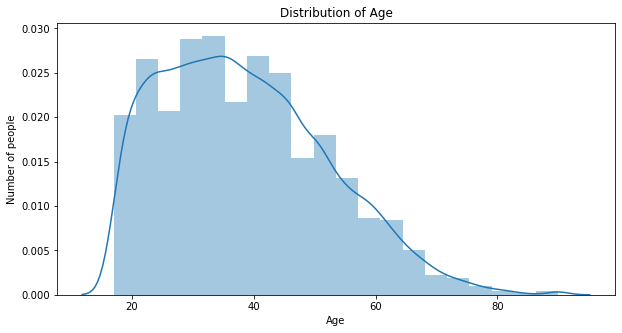

In [20]:
plt.figure(figsize=(10, 5))
#plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
#plt.tick_params(labelsize=10)
plt.show()

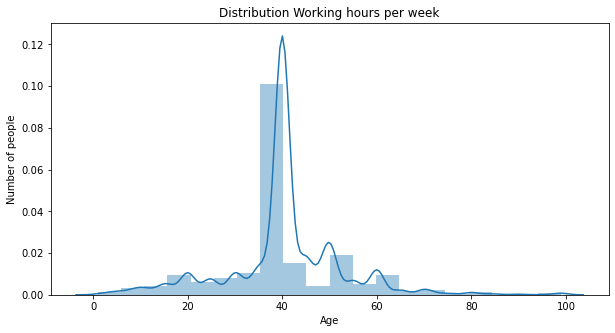

In [21]:
plt.figure(figsize=(10, 5))
#plt.style.use('fivethirtyeight')
sns.distplot(df['hours-per-week'], bins=20)
plt.title('Distribution Working hours per week')
plt.xlabel('Age')
plt.ylabel('Number of people')
#plt.tick_params(labelsize=10)
plt.show()

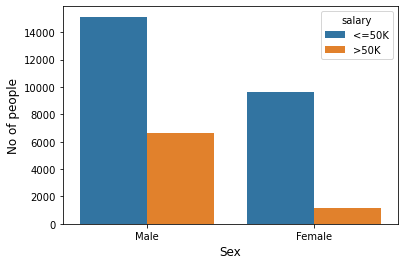

In [22]:
sns.countplot(x="sex",hue="salary",data=df)
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.show()

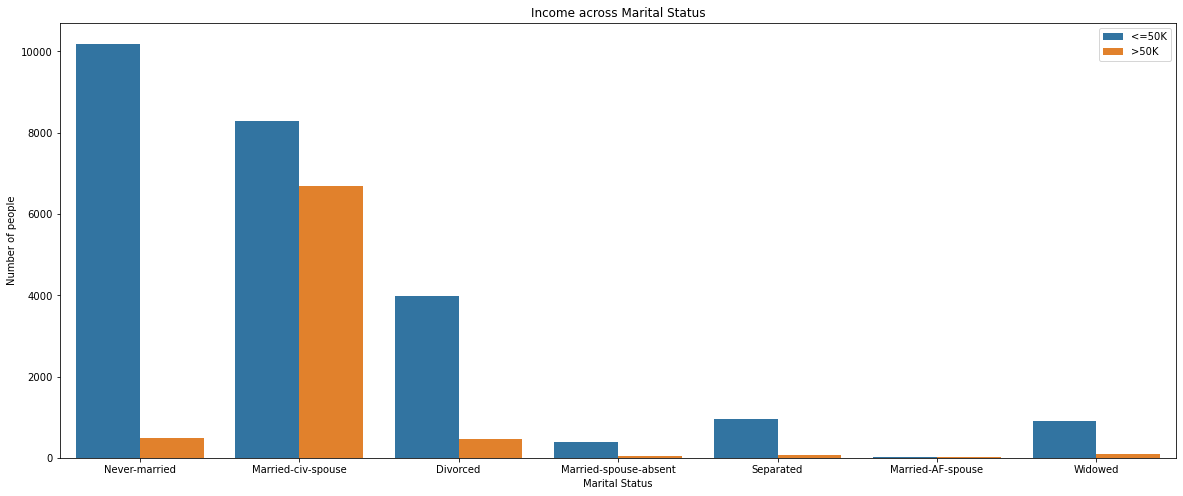

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(df['marital-status'], hue=df['salary'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.legend()
plt.show()


#### Converting categorical salary column into numeric 

In [24]:
LE = LabelEncoder()
df['salary']=LE.fit_transform(df['salary'])

In [25]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

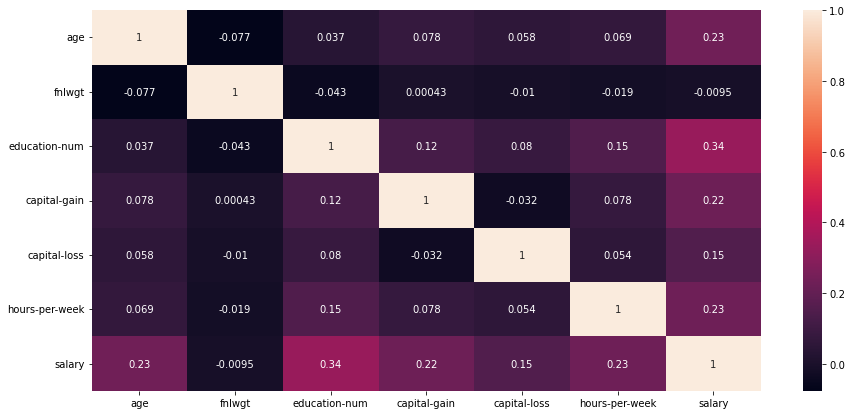

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain, captial loss and number of hours per week.

## > Data Preprocessing

#### Fixing '?' values in the dataset

In [27]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [28]:
df.replace(' ?',np.nan,inplace=True)

In [29]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [30]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [31]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
print("Null values:\n",df.isna().sum())

Null values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64


In [32]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
#figure=df.fnlwgt.hist(bins=50)

In [34]:
#df.boxplot(column='fnlwgt')

In [35]:
# from scipy.stats.mstats import winsorize

# df['fnlwgt'] = winsorize(df['fnlwgt'],(0.05,0.05))

# plt.boxplot(df['fnlwgt'])
# plt.title('Winsorized fnlwgt')
# plt.show()


#### label Encoding :-

In [36]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [37]:
def marital_status_encoder(m):
    if m == 'Never-married':
            return 0
    elif m == 'Married':
            return 1
    elif m == 'Divorced':
            return 2
    elif m == 'Separated':
            return 3
    elif m == 'Widowed':
            return 4
    elif m == 'Married-spouse-absent':
            return 5
    else:
            return 6

In [38]:
def relationship_encoder(r):
    if r == 'Not-in-family':
            return 0
    elif r == 'Husband':
            return 1
    elif r == 'Wife':
            return 2
    elif r == 'Own-child':
            return 3
    elif r == 'Unmarried':
            return 4
    else:
            return 5

In [39]:
def occupation_encoder(o):
    if o == 'Prof-specialty':
            return 0
    elif o == 'Craft-repair':
            return 1
    elif o == 'Exec-managerial':
            return 2
    elif o == 'Adm-clerical':
            return 3
    elif o == 'Sales':
            return 4
    elif o == 'Machine-op-inspct':
            return 5
    elif o == 'Transport-moving':
            return 6
    elif o == 'Handlers-cleaners':
            return 7
    elif o == 'Farming-fishing':
            return 8
    elif o == 'Tech-support':
            return 9
    elif o == 'Protective-serv':
            return 10
    elif o == 'Priv-house-serv':
            return 11
    elif o == 'Armed-Forces':
            return 12
    else:
            return 13

In [40]:
Occup_enc = df['occupation'].map(occupation_encoder)
Relation_enc = df['relationship'].map(relationship_encoder)
Marital_enc=df['marital-status'].map(marital_status_encoder)

In [41]:
df_enc = df
df_enc['occupation'] = Occup_enc
df_enc['relationship'] = Relation_enc
df_enc['marital-status'] =Marital_enc
df_enc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,0,3,0,White,Male,2174,0,40,US,0
1,50,Self-emp-not-inc,83311,Bachelors,13,6,2,1,White,Male,0,0,13,US,0
2,38,Private,215646,HS-grad,9,2,7,0,White,Male,0,0,40,US,0
3,53,Private,234721,11th,7,6,7,1,Black,Male,0,0,40,US,0
4,28,Private,338409,Bachelors,13,6,0,2,Black,Female,0,0,40,Non-US,0


In [42]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col]=le.fit_transform(df[col])

In [43]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,0,3,0,4,1,2174,0,40,1,0
1,50,6,83311,9,13,6,2,1,4,1,0,0,13,1,0
2,38,4,215646,11,9,2,7,0,4,1,0,0,40,1,0
3,53,4,234721,1,7,6,7,1,2,1,0,0,40,1,0
4,28,4,338409,9,13,6,0,2,2,0,0,0,40,0,0


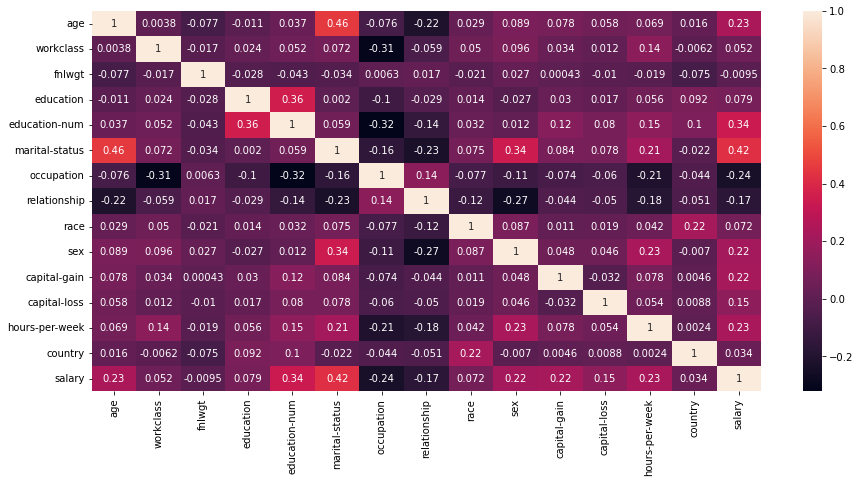

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [45]:
x = df.drop(['salary'],axis=1)
y = df.iloc[:,-1]

In [46]:
print(x,y)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          7   77516          9             13               0   
1       50          6   83311          9             13               6   
2       38          4  215646         11              9               2   
3       53          4  234721          1              7               6   
4       28          4  338409          9             13               6   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               6   
32557   40          4  154374         11              9               6   
32558   58          4  151910         11              9               4   
32559   22          4  201490         11              9               0   
32560   52          5  287927         11              9               6   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               3        

### Feature Selection

In [47]:
# feature_importances = imp_feature.feature_importances_
# importance_df = pd.DataFrame({
#     'feature': x,
#     'importance': feature_importances
# }).sort_values('importance', ascending=False)
# importance_df

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

select = ExtraTreesClassifier()
select.fit(x,y)

# imp_feature=select.feature_importances_


# for index,val in enumerate(imp_feature):
#     print(index,round(val*100,2))

# print(x.info())

ExtraTreesClassifier()

In [49]:
print(select.feature_importances_)

[0.15254657 0.04455432 0.16720495 0.03687663 0.08027486 0.12331533
 0.08675897 0.0491601  0.01500425 0.02688685 0.08837316 0.02748247
 0.09326039 0.00830114]


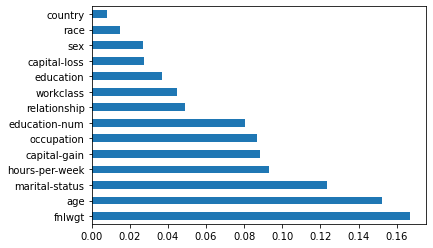

In [50]:
# Graph of feature importance for better visualization
feat_imp = pd.Series(select.feature_importances_,index=x.columns)
feat_imp.nlargest(15).plot(kind='barh')
plt.show()

In [51]:
x = x.drop(['workclass', 'education', 'race', 'sex',
            'country', 'fnlwgt','capital-loss'], axis=1)

In [52]:
#df = df.drop('country',axis = 1)
#df

In [53]:
x.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
x.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

In [54]:
# df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
# df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

          feature        VIF
0             age   9.505829
1   education-num  10.860512
2  marital-status   3.420506
3      occupation   2.156182
4    relationship   2.085307
5    capital-gain   1.124854
6  hours-per-week   9.830186


In [56]:
print(x)
print(y)

       age  education-num  marital-status  occupation  relationship  \
0       39             13               0           3             0   
1       50             13               6           2             1   
2       38              9               2           7             0   
3       53              7               6           7             1   
4       28             13               6           0             2   
...    ...            ...             ...         ...           ...   
32556   27             12               6           9             2   
32557   40              9               6           5             1   
32558   58              9               4           3             4   
32559   22              9               0           3             3   
32560   52              9               6           2             2   

       capital-gain  hours-per-week  
0                 1              40  
1                 0              13  
2                 0              

In [57]:
round(y.value_counts(normalize=True) * 100, 2).astype('str')

0    75.92
1    24.08
Name: salary, dtype: object

In [58]:
#!pip install imblearn

In [59]:
# # balancing the skewed data
# from imblearn.over_sampling import RandomOverSampler 
# rs = RandomOverSampler(random_state=30)

In [60]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# x = scaler.fit_transform(x) 


In [61]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

ros.fit(x,y)

X_resampled, Y_resampled = ros.fit_resample(x, y)

x = X_resampled
y = Y_resampled

In [62]:
round(y.value_counts(normalize=True) * 100, 2).astype('str')

0    50.0
1    50.0
Name: salary, dtype: object

### Splitting the data

In [63]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,random_state=42)

In [64]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((39552, 7), (9888, 7), (39552,), (9888,))

## Data Modelling

#### 1) Logistic Regression

In [65]:
LR = LogisticRegression()
LR.fit(train_x,train_y)

LogisticRegression()

In [66]:
pred_y = LR.predict(test_x)

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy =",accuracy_score(test_y,pred_y))
print("Training Score =",LR.score(train_x,train_y))

Accuracy = 0.8027912621359223
Training Score = 0.7992010517799353


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(test_y, pred_y)
print(confusion_matrix2)

[[3711 1227]
 [ 723 4227]]


In [69]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(test_y,pred_y)))

0.4440819044546599


#### 2) Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)

DecisionTreeClassifier()

In [71]:
pred_y2 = DT.predict(test_x)

In [72]:
print("Accuracy =",accuracy_score(test_y,pred_y2))
print("Training Score =",LR.score(train_x,train_y))

Accuracy = 0.8776294498381877
Training Score = 0.7992010517799353


#### 3) Random Forest Classifier 

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
RF = RandomForestClassifier()
RF.fit(train_x,train_y)

RandomForestClassifier()

In [75]:
pred_y3 = RF.predict(test_x)

In [76]:
print("Accuracy = ",accuracy_score(test_y,pred_y3))
print("Training Score = ",RF.score(train_x,train_y))

Accuracy =  0.8903721682847896
Training Score =  0.9541868932038835


In [77]:
print(np.sqrt(mean_squared_error(test_y,pred_y3)))

0.33110093886186787


In [78]:
#Confusion Matrix
confusion_matrix1 = confusion_matrix(test_y, pred_y3)
print(confusion_matrix1)

[[4115  823]
 [ 261 4689]]


In [79]:
pd.DataFrame({'Actual':test_y,'prediccted':pred_y3})

,Actual,prediccted
32168,0,0
199,0,0
16026,0,1
10791,0,0
33656,1,1
...,...,...
30612,0,0
33730,1,0
4546,1,1
26559,1,1


In [80]:
import pickle

pickle.dump(RF,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [81]:
prediction_y = model.predict(test_x)

In [82]:
accuracy_score(test_y, prediction_y)

0.8903721682847896